In [63]:
# Imports
from PIL import Image
import numpy as np
import cv2
import math
from scipy.fft import dct
import matplotlib.pyplot as plt
import os

## Compressing one 8x8 block

In [64]:
#convert image to grey scale
im = cv2.imread('data/yasuo.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [65]:
#getting an 8x8 block
init_x=50
init_y=100
block = np.array(im[init_x:init_x+8, init_y:init_y+8], dtype=float)-128

In [66]:
block

array([[   5.,  -57.,  -37.,  -55.,  -32.,   82.,   39.,   47.],
       [ -21.,  -49.,  -52.,  -74.,  -33.,   88.,   49.,   79.],
       [ -29.,  -43.,  -58.,  -48., -103.,   34.,   90.,   70.],
       [ -33.,  -36.,  -45.,  -45.,  -77., -105.,   45.,   76.],
       [ -54.,  -44.,  -45.,  -71.,  -49.,  -75., -109.,   68.],
       [ -44.,  -42.,  -40.,  -52.,  -40.,   31.,  -62.,  -89.],
       [ -34.,  -25.,  -42.,  -74.,  -40.,   -8.,   -5.,  -46.],
       [ -29.,  -40.,  -53.,  -55.,  -37.,   -2.,  -22.,  -14.]])

In [67]:
#define c function used in DCT
def c_funct(i):
    if i==0:
        return 1/(2**(1/2))
    else:
        return 1

def dct_matrix():
    result_matrix = np.zeros(shape=(8,8))
    sum = 0
    for i in range(8):
        for j in range(8):
            if i ==0:
                result_matrix[i,j] = np.sqrt(1/8)
            else:
                result_matrix[i,j] = np.sqrt(2/8)*math.cos(((2*j+1)*i*math.pi)/16)
    return result_matrix
    
def dct_funct(block):
    return np.matrix(dct_matrix()) * np.matrix(block) * np.matrix(dct_matrix().transpose())

def idct_funct(block):
    return np.matrix(dct_matrix().transpose()) * np.matrix(block) * np.matrix(dct_matrix())

def round(block_val, q_mat_val):
    return np.round(block_val/q_mat_val)
    if block_val>0:
        return np.floor((block_val+np.floor(q_mat_val/2))/q_mat_val)
    else:
        return np.floor((block_val-np.floor(q_mat_val/2))/q_mat_val)

def quantization(block, q_mat):
    result_mat = np.zeros(shape=(8,8))
    for i in range(8):
        for j in range(8):
            result_mat[i,j] = round(block[i,j], q_mat[i,j])
    
    return result_mat

def inv_quantization(block, q_mat):
    result_mat = np.zeros(shape=(8,8))
    for i in range(8):
        for j in range(8):
            result_mat[i,j] = block[i,j]*q_mat[i,j]
    return result_mat

In [68]:
quant_mat = np.matrix([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]])

In [69]:
block

array([[   5.,  -57.,  -37.,  -55.,  -32.,   82.,   39.,   47.],
       [ -21.,  -49.,  -52.,  -74.,  -33.,   88.,   49.,   79.],
       [ -29.,  -43.,  -58.,  -48., -103.,   34.,   90.,   70.],
       [ -33.,  -36.,  -45.,  -45.,  -77., -105.,   45.,   76.],
       [ -54.,  -44.,  -45.,  -71.,  -49.,  -75., -109.,   68.],
       [ -44.,  -42.,  -40.,  -52.,  -40.,   31.,  -62.,  -89.],
       [ -34.,  -25.,  -42.,  -74.,  -40.,   -8.,   -5.,  -46.],
       [ -29.,  -40.,  -53.,  -55.,  -37.,   -2.,  -22.,  -14.]])

In [70]:
np.round(np.matrix(dct_matrix())*np.matrix(dct_matrix().transpose()),2)

array([[ 1.,  0., -0.,  0.,  0.,  0., -0., -0.],
       [ 0.,  1.,  0., -0.,  0., -0.,  0.,  0.],
       [-0.,  0.,  1.,  0., -0.,  0.,  0.,  0.],
       [ 0., -0.,  0.,  1.,  0.,  0., -0., -0.],
       [ 0.,  0., -0.,  0.,  1.,  0., -0., -0.],
       [ 0., -0.,  0.,  0.,  0.,  1.,  0., -0.],
       [-0.,  0.,  0., -0., -0.,  0.,  1.,  0.],
       [-0.,  0.,  0., -0., -0., -0.,  0.,  1.]])

In [71]:
np.matrix(np.round(dct_funct(block), 0))

matrix([[-196., -171.,  138.,   28.,  -37.,   -3.,   54.,  -30.],
        [ 111., -122.,   80.,    6.,   -9.,   35.,   25.,  -17.],
        [  65.,  -21.,  -36.,  108.,  -47.,   12.,   33.,   -8.],
        [ -32.,   61.,  -75.,   40.,    6.,  -48.,   52.,   -1.],
        [ -18.,   15.,   29.,  -70.,   74.,  -23.,   -6.,   23.],
        [  11.,   10.,   19.,   -8.,  -26.,   57.,  -51.,   23.],
        [   0.,    9.,  -28.,   31.,  -28.,   36.,   11.,  -31.],
        [  -8.,   -9.,   22.,  -18.,   11.,  -20.,   17.,  -11.]])

In [72]:
#quantization of block
quant_block = quantization(np.round(dct_funct(block)), quant_mat)


In [73]:
quant_block

array([[-12., -16.,  14.,   2.,  -2.,  -0.,   1.,  -0.],
       [  9., -10.,   6.,   0.,  -0.,   1.,   0.,  -0.],
       [  5.,  -2.,  -2.,   4.,  -1.,   0.,   0.,  -0.],
       [ -2.,   4.,  -3.,   1.,   0.,  -1.,   1.,  -0.],
       [ -1.,   1.,   1.,  -1.,   1.,  -0.,  -0.,   0.],
       [  0.,   0.,   0.,  -0.,  -0.,   1.,  -0.,   0.],
       [  0.,   0.,  -0.,   0.,  -0.,   0.,   0.,  -0.],
       [ -0.,  -0.,   0.,  -0.,   0.,  -0.,   0.,  -0.]])

In [74]:
#inverse quantization
inv_quant_block = inv_quantization(quant_block, quant_mat)


In [75]:
inv_dct = idct_funct(inv_quant_block)

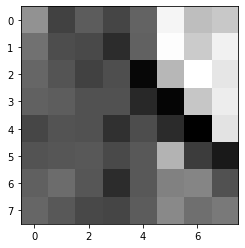

In [76]:
plt.imshow(block,cmap='gray')

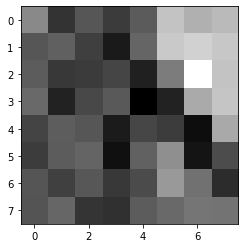

In [77]:
plt.imshow(inv_dct, cmap='gray')

## Compressing the entire image

In [78]:
# compressing the entire image
im = cv2.imread('data/yasuo.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
image_cropped = np.matrix(im[0:224, 0:224], dtype=float)-128

In [79]:
quant_mat = np.matrix([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]])

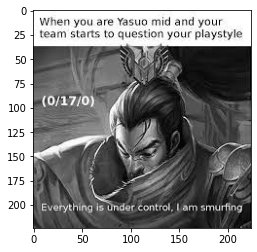

In [80]:
plt.imshow(image_cropped, cmap='gray')

In [81]:
result = np.zeros(shape=(224,224))
for i in range(int(224/8)):
    for j in range(int(224/8)):
        block = image_cropped[i*8:(i+1)*8, j*8:(j+1)*8]
        dct = np.round(dct_funct(block),0)
        quant = np.round(quantization(dct, quant_mat))
        iquant = inv_quantization(quant, quant_mat)
        idct = idct_funct(iquant)
        result[i*8:(i+1)*8, j*8:(j+1)*8] = idct

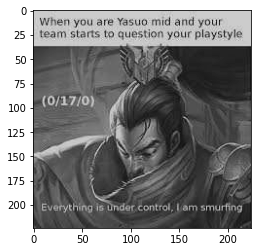

In [82]:
plt.imshow(result, cmap='gray')

## Designing new quantizer

In [83]:
# get image file names
image_file_path = 'data/org/'
files = [f for f in os.listdir(image_file_path)]
files.remove('.DS_Store')
training_set = np.array([])

In [84]:
# functions for creating and storing DCT of 8x8 blocks

def import_image(file_path):
    im = cv2.imread(image_file_path + file_path)
    return cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

#cuts images into 8x8 blocks and applies dct, returns array of 8x8 matricies
def blockify(image):
    len_rounded = int(image.shape[0]/8)
    width_rounded = int(image.shape[1]/8)
    return_array = np.zeros(shape=(len_rounded*8, width_rounded*8))

    for i in range(len_rounded):
        for j in range(width_rounded):
            image_block = np.array(image[i*8:(i+1)*8, j*8:(j+1)*8], dtype=float) #decide whether to subtract 128
            return_array[i*8:(i+1)*8, j*8:(j+1)*8] = dct_funct(image_block)
    return return_array

def generate_training(dct_block):
    return_arr = []
    len_rounded = int(dct_block.shape[0]/8)
    width_rounded = int(dct_block.shape[1]/8)
    for i in range(len_rounded):
        for j in range(width_rounded):
            return_arr.append(dct_block[i*8:(i+1)*8, j*8:(j+1)*8])
    return return_arr
    
def quantization(dct_block):
    pass

def reconstruct(quantized_block):
    len_rounded = int(quantized_block.shape[0]/8)
    width_rounded = int(quantized_block.shape[1]/8)
    recon_image = np.zeros(shape=(len_rounded*8, width_rounded*8))
    for i in range(len_rounded):
        for j in range(width_rounded):
            recon_image[8*i:8*(i+1), 8*j:8*(j+1)] = idct_funct(quantized_block[8*i:8*(i+1), 8*j:8*(j+1)])
    return recon_image


In [85]:
bit_al_mat = np.matrix([[6,4,3,1,0,0,0,0],
                        [3,2,2,0,0,0,0,0],
                        [1,1,1,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        ])

In [86]:
quantizer_array[2]

[KMeans(), (0, 2)]

## Training quantizer with zero channel error

In [87]:
#for testing, using kmeans clustering algorithm (doesnt account for channel error)
from sklearn.cluster import KMeans
mat_len = bit_al_mat.shape[0]
mat_width = bit_al_mat.shape[1]
quantizer_array = []
for i in range(mat_len):
    for j in range(mat_width):
        if bit_al_mat[i,j]!=0:
            print(bit_al_mat[i,j], 2**bit_al_mat[i,j], (i,j))
            quantizer_array.append([KMeans(n_clusters=2**bit_al_mat[i,j]), (i,j)])

# TODO: create a function that takes in matrix and automatically creates quantizers for each element in matrix

6 64 (0, 0)
4 16 (0, 1)
3 8 (0, 2)
1 2 (0, 3)
3 8 (1, 0)
2 4 (1, 1)
2 4 (1, 2)
1 2 (2, 0)
1 2 (2, 1)
1 2 (2, 2)


In [88]:
training_set = []
count = 0
for image_path in files:
    print(count)
    count =count+1
    blocks = blockify(import_image(image_path))
    training_set = training_set + generate_training(blocks)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202


In [89]:
# training quantizers
count = 0
for element in quantizer_array:
    print(count)
    count =count + 1
    bit_location = element[1]
    element[0].fit(np.array(training_set)[:,bit_location[0],bit_location[1]].reshape(-1,1))

0
1
2
3
4
5
6
7
8
9


## Testing quantizer with zero channel error

In [90]:
image = cv2.imread(image_file_path+ files[0])
image =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_dct_blocks = blockify(image)

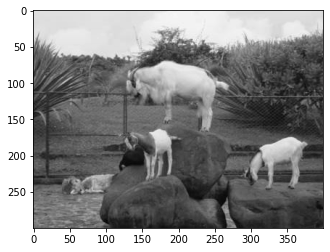

In [91]:
#before compression
plt.imshow(image, cmap='gray')

In [92]:
quantizer_array[0][0].predict([[2]])

array([59], dtype=int32)

In [135]:
return_block_array = []
length = int(image.shape[0]/8)
width = int(image.shape[1]/8)
quantized_output = np.zeros(shape=(length*8, width*8))
for i in range(length):
    for j in range(width):
        block = image_dct_blocks[i*8: (i+1)*8, j*8: (j+1)*8]
        quantized_block = np.zeros(shape=(8,8))
        for element in quantizer_array:
            location = element[1]
            centroid_locations = element[0].cluster_centers_
            pixel_val = block[location]
            centroid_num = element[0].predict([[pixel_val]])[0]
            quantized_block[location] = centroid_locations[centroid_num].copy()
        quantized_output[i*8: (i+1)*8, j*8: (j+1)*8] = quantized_block



In [131]:
block = image_dct_blocks[0:8,0:8]
quantized_block = np.zeros(shape=(8,8), dtype=float)
for element in quantizer_array:
        location = element[1]
        centroid_locations = element[0].cluster_centers_

        pixel_val = block[location]

        centroid_num = element[0].predict([[pixel_val]])[0]

        quantized_block[location] = centroid_locations[centroid_num].copy()
        #need to map cluster to location

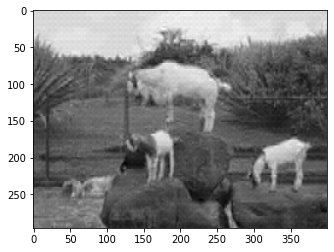

In [140]:
plt.imshow(reconstruct(quantized_output), cmap='gray')

In [97]:
# cut the images into 8x8 blocks and apply dct
# take value in matrix and train quantizer on it
# turn quantizer code into a class

In [98]:
# data preparation